In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline


import csv
import matplotlib.mlab as mlab
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq
from scipy.stats import chisquare

In [6]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [7]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/091118-ringing-2

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/091118-ringing-2


In [8]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['data.txt']

In [9]:
ml = 1e3
Hold = np.loadtxt('data.txt')
Xhot = moving_average(Hold[0]*ml,100)
Yhot = moving_average(Hold[1]*ml,100)


In [10]:
a=find_nearest(Xhot,200)
meancut = np.where(Xhot==a)[0][0]
sigma = np.std(Yhot[meancut:])
sigma

0.9191676436091325

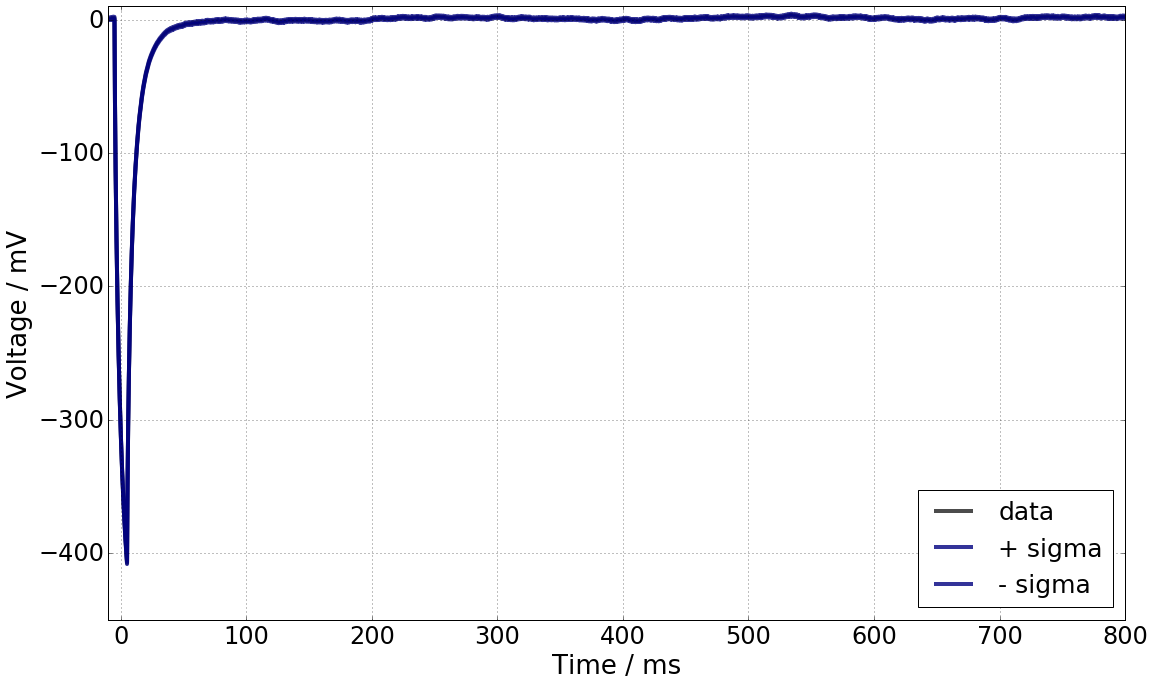

In [17]:
plt.figure(figsize=(15,9))

plt.plot(Xhot,Yhot,color='k',linewidth=4,alpha=0.7,label='data')
plt.plot(Xhot,Yhot+sigma,color='navy',linewidth=4,alpha=0.8,label='+ sigma')
plt.plot(Xhot,Yhot-sigma,color='navy',linewidth=4,alpha=0.8,label='- sigma')


plt.xlim(-10,800)
plt.ylim(-450,10)
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()